# Week 4 Tutorial Sheet Notes

## Data Wrangling in Python
<br>
<div style = 'justify'>
Upload the file Patients.txt (from Alexandria) to the same folder location as your Jupyter Notebook and then start a new Python 3 Notebook. The first 4 lines of the file <code>Patients.txt</code> content looks like...</div>

<code>001M11/11/1998 88140 80 10
016F11/13/1998 84120 78 X0
033X10/21/1998 68190100 31
004F01/01/1999101200120 5A</code>

As usual we will still import the pandas library

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt

## Reading a text file format

Then we will call the function <code>.read_fwf()</code> in order to read the txt file which has data separated into columns of fixed width. fwf stands for fixed_width_format, and this means that pandas will try to judge what's the columns based on the whitespace and "backslash en's" it has. Using ```colspecs = 'infer'``` will have Pandas automatically adjust the columns for you. 

In [2]:
patientDF = pd.read_fwf('Patient.txt', colspecs = 'infer', header = None)

In [3]:
patientDF

,0,1
0,001M11/11/1998 88140 80,10
1,016F11/13/1998 84120 78,X0
2,033X10/21/1998 68190100,31
3,004F01/01/1999101200120,5A
4,XX5M05/07/1998 68120 80,10
5,006 06/15/1999 72102 68,61
6,007M08/32/1998 88148102,0
7,008F08/08/1998210,70
8,009M09/25/1999 86240180,41
9,010F10/19/1999 40120,10


As you can see here, the columns are not exactly what we want. This is because pandas tried to include all of the data that might potentially be a column. Some rows are in one big line, which pandas think is a whole column instead.

You should get (30, 2) which means that it has 30 rows and 2 columns. From our manual inspection, we probably can tell that this is not what we want. Looking at a line of the raw content, it seems that the first 3 digits means something, followed by an indication that the person is either a Male (M) or Female (F), then followed by a date and so on. Let’s assume that we are aware that the data should contain the following information.

● A 3 digit identity<br>
● Gender<br>
● Date of visit<br>
● 3 digit heart rate reading<br>
● 3 digit Systolic blood pressure<br>
● 3 digit Diastolic blood pressure<br>
● 3 digit Diagnostic code<br>
● 1 digit to indicate whether it is an Adverse Event

Instead of doing colspec = 'infer', we can specify the widths ourselves instead using the ```width``` parameter.

In [4]:
patientsDF = pd.read_fwf('Patient.txt', widths=[3,1,10,3,3,3,3,1], header=None)
patientsDF

,0,1,2,3,4,5,6,7
0,001,M,11/11/1998,88.0,140.0,80.0,1,0
1,016,F,11/13/1998,84.0,120.0,78.0,X,0
2,033,X,10/21/1998,68.0,190.0,100.0,3,1
3,004,F,01/01/1999,101.0,200.0,120.0,5,A
4,XX5,M,05/07/1998,68.0,120.0,80.0,1,0
5,006,NaN,06/15/1999,72.0,102.0,68.0,6,1
6,007,M,08/32/1998,88.0,148.0,102.0,NaN,0
7,008,F,08/08/1998,210.0,NaN,NaN,7,0
8,009,M,09/25/1999,86.0,240.0,180.0,4,1
9,010,F,10/19/1999,40.0,120.0,NaN,1,0


## Cleaning the dataframe

Obviously, this dataframe is a no-go, look at it, it is horrible. Bad column headers, some of the values are 'f' instead of 'F'. We have to standardized this using certain functions. Functions in which by now you should be able to use easily. Such as ```.rename()``` to change the dataframe to a standardized version.

In [5]:
patientsDF.rename(columns = {0: 'ID', 
                             1:'Gender', 
                             2:'Visit', 
                             3: 'HR', 
                             4:'SBP',
                             5: 'DBP',
                             6:'DX',
                             7:'AE'}, inplace = True) 
patientsDF

,ID,Gender,Visit,HR,SBP,DBP,DX,AE
0,001,M,11/11/1998,88.0,140.0,80.0,1,0
1,016,F,11/13/1998,84.0,120.0,78.0,X,0
2,033,X,10/21/1998,68.0,190.0,100.0,3,1
3,004,F,01/01/1999,101.0,200.0,120.0,5,A
4,XX5,M,05/07/1998,68.0,120.0,80.0,1,0
5,006,NaN,06/15/1999,72.0,102.0,68.0,6,1
6,007,M,08/32/1998,88.0,148.0,102.0,NaN,0
7,008,F,08/08/1998,210.0,NaN,NaN,7,0
8,009,M,09/25/1999,86.0,240.0,180.0,4,1
9,010,F,10/19/1999,40.0,120.0,NaN,1,0


### Practise 3: Plot a scatter plot of Heart Rate (HR) against Systolic Blood Pressure (SBP) using matplotlib:

This should be relatively easy to do as well, just by following the documentation.<br>
Further reading: <a href = 'https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html'>https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html</a>

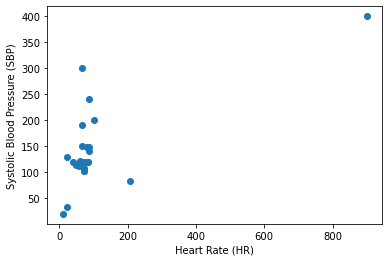

In [15]:
prac3 = plt.scatter(y = patientsDF['SBP'], x = patientsDF['HR'])
plt.ylabel('Systolic Blood Pressure (SBP)')
plt.xlabel('Heart Rate (HR)')
plt.show()

### Practice 4: Label the axes for HR and SBP as “Heart Rate (HR)” and “Systolic Blood Pressure (SBP)”. You should get a graph that looks like: 
Answer above.

A 2 dimensional plot would normally mean a comparison between 2 variables. However, we can use other means, such as colour to help us visualize more. If we wanted to see more information on the same plot, we could use a third column to colour the dots by modifying the call to "scatter" above: 
<br>
Note that ```cmap``` will only work if you currently have a ```c``` argument. If you're still confused, the 3rd variable which is 'DBP' is plotted using the intensity of the colors instead. And the cmap color scheme is 'hot'. More schemes can be found <a href = https://matplotlib.org/stable/tutorials/colors/colormaps.html>here.</a>

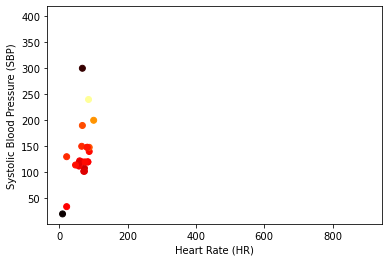

In [17]:
prac = plt.scatter(y = patientsDF['SBP'], x = patientsDF['HR'], c = patientsDF['DBP'], cmap = 'hot')
plt.ylabel('Systolic Blood Pressure (SBP)')
plt.xlabel('Heart Rate (HR)')
plt.show()

## 1.2 Substituting Values

We can see a missing value ('NaN'), some likely incorrect values ('X', '2'), and some inconsistency in the labelling, (both 'f' and 'F' used to denote female). We can select the rows containing lowercase 'f' as follows:

There are actually many ways that we are taught to replace values in a dataframe. Using ```loc``` is one of them. Let's take a look at the first option: 
<br>
<br>
Over here you can clearly invoke the method ```.replace()``` and literally replace ```'f'``` with ```'F'```

In [19]:
patientsDF['Gender'] = patientsDF['Gender'].replace('f', 'F')
patientsDF

,ID,Gender,Visit,HR,SBP,DBP,DX,AE
0,001,M,11/11/1998,88.0,140.0,80.0,1,0
1,016,F,11/13/1998,84.0,120.0,78.0,X,0
2,033,X,10/21/1998,68.0,190.0,100.0,3,1
3,004,F,01/01/1999,101.0,200.0,120.0,5,A
4,XX5,M,05/07/1998,68.0,120.0,80.0,1,0
5,006,NaN,06/15/1999,72.0,102.0,68.0,6,1
6,007,M,08/32/1998,88.0,148.0,102.0,NaN,0
7,008,F,08/08/1998,210.0,NaN,NaN,7,0
8,009,M,09/25/1999,86.0,240.0,180.0,4,1
9,010,F,10/19/1999,40.0,120.0,NaN,1,0


Second method! Following the tutorial sheet. More about ```.loc[]``` can be read <a href = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html>here</a>.